### Exercise 3.1

This one would let us solve a poisson equation in a 1-d geometry with 101 points. It requires using a sparse matrix to save the data. 

In [8]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import spsolve

#### Step 1: Setup the mesh

In [3]:
# Numerical model parameters
xsize = 1000000.0 # Model size, m
xnum = 1000   # Number of nodes
xstp = xsize/(xnum-1) # Grid step

#### Step 2: Now we start to construct the coefficent matrix and matrix

In [9]:
# Composing matrix of coefficients L()
# and vector (column) of right parts R()
# First point: FI=0
# Coefficient matrix initialization
L = csr_matrix((xnum,xnum))
L[0,0] = 1
# Vector of right part initialization
R = np.zeros((xnum,1))
R[0,0] = 0
# Intermediate points
for i in range(1, xnum-1):
    # d2FI/dx2=1
    # (FI(i-1)-2*FI(i)+FI(i+1))/dx^2=1
    L[i,i-1] = 1.0/xstp**2.0
    L[i,i] = -2.0/xstp**2.0
    L[i,i+1] = 1.0/xstp**2.0
    R[i,0] = 1.0 
# Last point: FI=0
L[xnum-1, xnum-1] = 1.0
R[xnum-1, 0] = 0.0

/home/lochy/anaconda3/envs/gel298_winter/lib/python3.8/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


#### Step 3: solve

In [10]:
# Obtaining vector (line) of solutions S()
S = spsolve(L, R)

#### Step 4: plot

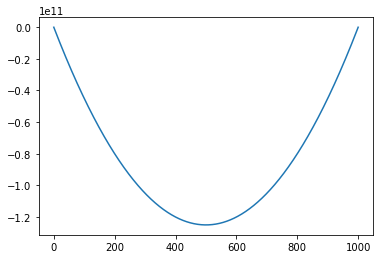

In [13]:
x = np.linspace(0.0, xsize, xnum)
plt.plot(x/1000.0,S)
plt.show()